In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test= np.load("./chest_xray_data_rgb.npy", allow_pickle=True)

In [ ]:
densenet_model = tf.keras.applications.DenseNet201(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=X_train[0].shape,
    pooling=None
)
densenet_model.trainable = True

for layer in densenet_model.layers:
  if 'conv5' in layer.name:
    layer.trainable = True
  else:
    layer.trainable = False

82534400/82524592 [==============================] - 1s 0us/step


In [ ]:
densenet_model.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [ ]:
x = tf.keras.layers.Flatten()(densenet_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(densenet_model.input, x)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
results = model.evaluate(X_test, y_test)
print(results)

Epoch 1/10
163/163 [==============================] - 106s 475ms/step - loss: 0.4204 - accuracy: 0.8785 - val_loss: 0.6155 - val_accuracy: 0.6875
Epoch 2/10
163/163 [==============================] - 72s 439ms/step - loss: 0.3071 - accuracy: 0.8955 - val_loss: 1.5881 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 71s 438ms/step - loss: 0.2788 - accuracy: 0.9210 - val_loss: 0.6597 - val_accuracy: 0.6875
Epoch 4/10
163/163 [==============================] - 72s 440ms/step - loss: 0.1947 - accuracy: 0.9271 - val_loss: 0.9667 - val_accuracy: 0.6250
Epoch 5/10
163/163 [==============================] - 71s 438ms/step - loss: 0.2200 - accuracy: 0.9294 - val_loss: 1.5206 - val_accuracy: 0.5625
Epoch 6/10
163/163 [==============================] - 71s 438ms/step - loss: 0.2221 - accuracy: 0.9342 - val_loss: 0.9083 - val_accuracy: 0.7500
Epoch 7/10
163/163 [==============================] - 71s 438ms/step - loss: 0.1676 - accuracy: 0.9530 - val_loss: 1.2902 - val_a

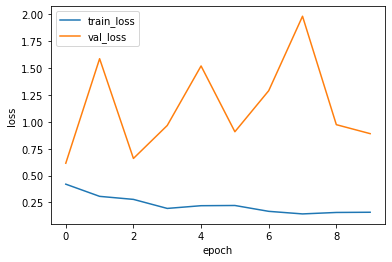

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

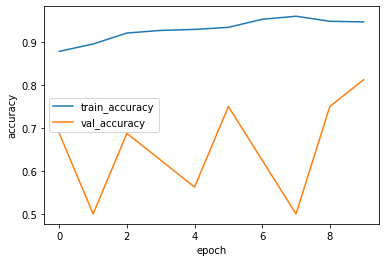

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred.reshape(624)
y_pred1 = np.zeros(624)
for i in range(len(y_pred)):
  if y_pred[i] > 0.5:
    y_pred1[i]=1

In [ ]:
# y_pred1

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
target_names = ['NORMAL', 'PNEUMONIA']
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1, target_names=target_names))

[[183  51]
 [ 29 361]]
              precision    recall  f1-score   support

      NORMAL       0.86      0.78      0.82       234
   PNEUMONIA       0.88      0.93      0.90       390

    accuracy                           0.87       624
   macro avg       0.87      0.85      0.86       624
weighted avg       0.87      0.87      0.87       624

